Link to the dataset : https://www.climatewatchdata.org/data-explorer/historical-emissions?historical-emissions-data-sources=cait&historical-emissions-gases=all-ghg&historical-emissions-regions=All%20Selected&historical-emissions-sectors=All%20Selected&page=1



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/historical_emissions/historical_emissions.csv")


In [3]:
data.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1859,1858,1857,1856,1855,1854,1853,1852,1851,1850
0,World,CAIT,Total including LUCF,All GHG,MtCO₂e,NaN,49947.42,49312.19,49828.88,49494.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e,NaN,47600.00,47100.00,46800.00,46600.00,...,1240.0,1190.0,1170.0,1150.0,1110.0,1080.0,1020.0,984.0,953.0,927.0
2,World,CAIT,Total excluding LUCF,All GHG,MtCO₂e,NaN,46730.35,46095.12,45916.49,45917.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,CAIT,Total including LUCF,CO2,MtCO₂e,NaN,37121.45,36654.53,37115.41,37055.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,World,CAIT,Energy,All GHG,MtCO₂e,NaN,36435.64,35970.69,35951.84,36053.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.Sector.unique()

array(['Total including LUCF', 'Total excluding LULUCF',
       'Total excluding LUCF', 'Energy', 'Total fossil fuels and cement',
       'Total GHG emissions without LULUCF', 'Electricity/Heat',
       'Total GHG emissions with LULUCF', 'Coal', 'Oil', 'Transportation',
       'Gas', 'Manufacturing/Construction', 'Agriculture',
       'Industrial Processes and Product Use',
       'Land-Use Change and Forestry', 'Industrial Processes', 'Building',
       'Fugitive Emissions', 'Waste', 'Cement', 'Other Fuel Combustion',
       'Bunkers', 'Bunker Fuels', 'Gas flaring', 'Other',
       'Land Use, Land-Use Change and Forestry',
       'Solvent and Other Product Use',
       'Total GHG emissions excluding LULUCF/LUCF',
       'Total GHG emissions including LULUCF/LUCF'], dtype=object)

In [5]:
countries_list = ['Afghanistan', "Armenia", "Australia", 
                  "Azerbaijan", "Bangladesh", "Bhutan", 
                  "Brunei", "Cambodia", "China", 
                 "North Korea", "Fiji", "Georgia",
                 "India", "Indonesia", "Iran", 
                 "Japan", "Kazakhstan", "Kiribati", 
                 "Kyrgyzstan", "Laos", "Malaysia", 
                 "Maldives", "Marshall Islands", 
                 "Micronesia", "Mongolia", "Myanmar", 
                 "Nauru", "Nepal", "New Zealand", 
                 "Pakistan", "Palau", "Papua New Guinea",
                 "Philippines", "South Korea", "Russia", 
                 "Samoa", "Singapore", "Solomon Islands", 
                 "Sri Lanka", "Tajikistan", "Thailand", 
                 "Timor-Leste", "Tonga", "Turkey", 
                 "Turkmenistan", "Tuvalu", "Uzbekistan", 
                 "Vanuatu", "Vietnam"]

In [6]:
def get_dataframes(data, countries_list):
    
    df = data[data["Country"].isin(countries_list)] # we only take the countries in countries_list
    df = df.loc[:, :"2015"] # We only take the years starting from 2015
    df = df.groupby(["Country", "Sector", "Gas"]).mean().reset_index() # We group by Country Sector and Gas to take the mean of the different datasources
    df = df[~df.Sector.str.contains("Total")].reset_index(drop=True) # We remove the sectors that countains "Total"
    df = df[df.Gas.str.contains("All GHG")].reset_index(drop = True) # We only keep the Gas that corresponds to CO2
    df = df.drop("2018", axis = 1)
    
    df_perc = df.copy()
    df_perc = df_perc.merge(df_perc.groupby("Country").sum().reset_index(), on="Country", suffixes=("", "_tot")) # we sum on every country to create a total amount of co2, to calculate the percentages
    
    df_perc["2017"] = 100 * df_perc["2017"] / df_perc["2017_tot"] 
    df_perc["2016"] = 100 * df_perc["2016"] / df_perc["2016_tot"] 
    df_perc["2015"] = 100 * df_perc["2015"] / df_perc["2015_tot"] 
    
    df_perc = df_perc.drop(["2017_tot", "2016_tot", "2015_tot"], axis = 1)
    
    return df, df_perc
    

In [7]:
df, df_perc = get_dataframes(data, countries_list)

In [8]:
df_perc

,Country,Sector,Gas,2017,2016,2015
0,Afghanistan,Agriculture,All GHG,8.725445,8.956704,8.989497
1,Afghanistan,Building,All GHG,0.074235,0.023340,0.011867
2,Afghanistan,Bunker Fuels,All GHG,0.022841,0.023340,0.017801
3,Afghanistan,Electricity/Heat,All GHG,0.119918,0.116700,0.100872
4,Afghanistan,Energy,All GHG,44.380996,44.305053,44.348187
...,...,...,...,...,...,...
579,Vietnam,Land-Use Change and Forestry,All GHG,-3.888341,-3.862089,-4.074433
580,Vietnam,Manufacturing/Construction,All GHG,11.979739,11.654706,12.269820
581,Vietnam,Other Fuel Combustion,All GHG,0.780275,0.750962,0.812173
582,Vietnam,Transportation,All GHG,7.111864,6.749408,6.406280


<AxesSubplot:xlabel='Country', ylabel='2017'>

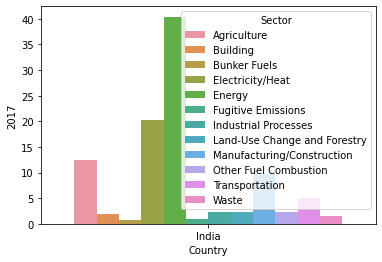

In [9]:
#ax, fig = plt.subplot(figsize = (14, 14))

sns.barplot(data = df_perc[df.Country == "India"], hue="Sector", x="Country", y = "2017")

In [10]:
df_perc.head(10)

,Country,Sector,Gas,2017,2016,2015
0,Afghanistan,Agriculture,All GHG,8.725445,8.956704,8.989497
1,Afghanistan,Building,All GHG,0.074235,0.023340,0.011867
2,Afghanistan,Bunker Fuels,All GHG,0.022841,0.023340,0.017801
3,Afghanistan,Electricity/Heat,All GHG,0.119918,0.116700,0.100872
4,Afghanistan,Energy,All GHG,44.380996,44.305053,44.348187
5,Afghanistan,Fugitive Emissions,All GHG,1.261992,1.277862,1.293538
6,Afghanistan,Industrial Processes,All GHG,0.519644,0.443459,0.350086
7,Afghanistan,Land-Use Change and Forestry,All GHG,0.000000,0.000000,0.000000
8,Afghanistan,Manufacturing/Construction,All GHG,1.964367,1.721321,1.714828
9,Afghanistan,Other Fuel Combustion,All GHG,38.933303,38.738476,38.331454


In [11]:
df.head(10)

,Country,Sector,Gas,2017,2016,2015
0,Afghanistan,Agriculture,All GHG,15.28,15.35,15.15
1,Afghanistan,Building,All GHG,0.13,0.04,0.02
2,Afghanistan,Bunker Fuels,All GHG,0.04,0.04,0.03
3,Afghanistan,Electricity/Heat,All GHG,0.21,0.20,0.17
4,Afghanistan,Energy,All GHG,77.72,75.93,74.74
5,Afghanistan,Fugitive Emissions,All GHG,2.21,2.19,2.18
6,Afghanistan,Industrial Processes,All GHG,0.91,0.76,0.59
7,Afghanistan,Land-Use Change and Forestry,All GHG,0.00,0.00,0.00
8,Afghanistan,Manufacturing/Construction,All GHG,3.44,2.95,2.89
9,Afghanistan,Other Fuel Combustion,All GHG,68.18,66.39,64.60


In [12]:
df.Sector.unique()

array(['Agriculture', 'Building', 'Bunker Fuels', 'Electricity/Heat',
       'Energy', 'Fugitive Emissions', 'Industrial Processes',
       'Land-Use Change and Forestry', 'Manufacturing/Construction',
       'Other Fuel Combustion', 'Transportation', 'Waste'], dtype=object)

In [ ]:
df.to